In [16]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.markers as markers
from datetime import datetime
import requests
from dotenv import load_dotenv
dotenv_local_path = '.env'
load_dotenv(dotenv_path=dotenv_local_path, verbose=True)

Python-dotenv could not parse statement starting at line 1


True

In [28]:
# Define function to load JSON data
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [27]:
# US High Yield Corporate Bond Index (Yield) BAMLH0A0HYM2EY
base_url = "https://www.quandl.com/api/v3/datasets/ML/USTRI.json?"
start_date = "1990-01-01"
end_date = "2020-11-25"
api_key = str(os.environ.get('quandl_key'))

url = base_url + start_date + end_date + api_key

response = requests.get(url)
data = response.json()

file_path = './data/us_hy_corp.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)

In [45]:
# Read us_hy_corp.json
file_path = './data/us_hy_corp.json'
us_hy_corp = read_json(file_path)

In [61]:
# Create dataframe
df_ = pd.DataFrame(us_hy_corp['dataset']['data'], columns= us_hy_corp['dataset']['column_names'])
df['DATE'] = df['DATE'].astype('datetime64[ns]')
df.head()

,DATE,BAMLH0A0HYM2EY
0,2020-11-24,4.79
1,2020-11-23,4.91
2,2020-11-20,4.95
3,2020-11-19,4.95
4,2020-11-18,4.91


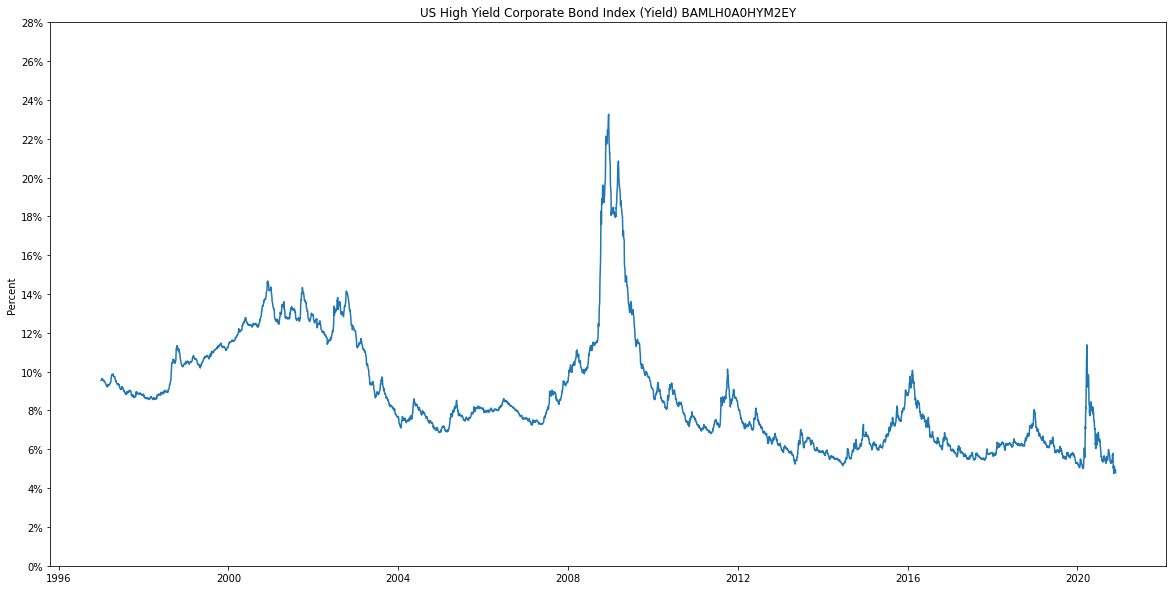

In [64]:
# Plot US High Yield Corporate Bond Index (Yield) BAMLH0A0HYM2EY
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(df.DATE, df.BAMLH0A0HYM2EY)
ax.set_ylabel('Percent')
ax.set_title('US High Yield Corporate Bond Index (Yield) BAMLH0A0HYM2EY')

plt.yticks([y for y in range(0,30,2)])

ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(str(int(y))+'%',''))
)

plt.show()
#ax.figure.savefig('./us_hy_corp.png', bbox_inches='tight', dpi=150)